In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# The direct URL to the raw .txt file on GitHub
url_turbine = "https://raw.githubusercontent.com/raccamateo/NEC_BP_LR/c7a75405cbda61f7e6a5d289065d5ea9baf2af19/A1-turbine.txt"

# Read the .txt file assuming it's tab-delimited
try:
    turbine_data = pd.read_csv(url_turbine, sep='\t', header=0)
    print(turbine_data.head())
except Exception as e:
    print(f"An error occurred while trying to read the file: {e}")


   height_over_sea_level   fall  net_fall  flow  \
0                  624.0  89.16    89.765   3.5   
1                  628.0  93.16    93.765   3.5   
2                  602.0  67.84    66.415   6.5   
3                  599.0  64.84    63.415   6.5   
4                  630.0  94.69    93.540   8.0   

   power_of_hydroelectrical_turbine  
0                           2512.85  
1                           2583.79  
2                           3748.77  
3                           3520.65  
4                           6673.84  


In [4]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(turbine_data.head())

First few rows of the dataset:
   height_over_sea_level   fall  net_fall  flow  \
0                  624.0  89.16    89.765   3.5   
1                  628.0  93.16    93.765   3.5   
2                  602.0  67.84    66.415   6.5   
3                  599.0  64.84    63.415   6.5   
4                  630.0  94.69    93.540   8.0   

   power_of_hydroelectrical_turbine  
0                           2512.85  
1                           2583.79  
2                           3748.77  
3                           3520.65  
4                           6673.84  


In [5]:
print(turbine_data.dtypes)

height_over_sea_level               float64
fall                                float64
net_fall                            float64
flow                                float64
power_of_hydroelectrical_turbine    float64
dtype: object


In [6]:
turbine_data = turbine_data.apply(pd.to_numeric, errors='coerce')

In [7]:
# Checking for Missing Values
missing_values_turbine = turbine_data.isnull().sum()
print("Missing values in each column:")
print(missing_values_turbine)

Missing values in each column:
height_over_sea_level               0
fall                                0
net_fall                            0
flow                                0
power_of_hydroelectrical_turbine    0
dtype: int64


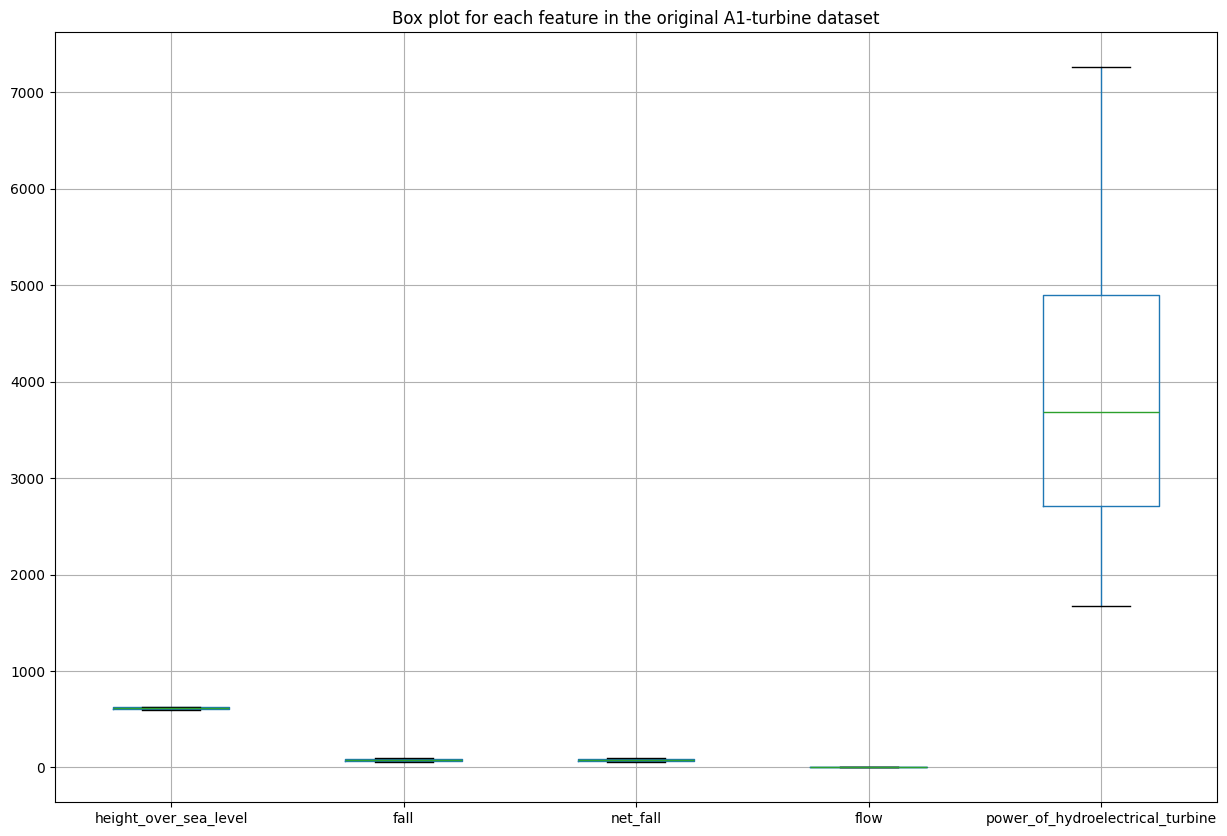

In [8]:
# Looking for Outliers using box plots on the original data (before normalization)
plt.figure(figsize=(15, 10))
turbine_data.boxplot()
plt.title("Box plot for each feature in the original A1-turbine dataset")
plt.show()

In [9]:
def scale_features(df, target_column, feature_range=(0.1, 0.9)):
    df_scaled = df.copy()
    for column in df.columns:
        if column != target_column:  # Skip the target column
            col_min = df[column].min()
            col_max = df[column].max()
            df_scaled[column] = feature_range[0] + (feature_range[1] - feature_range[0]) * (df[column] - col_min) / (col_max - col_min)
    return df_scaled


In [10]:
# Scale features and the target for the turbine_data
normalized_turbine_data = scale_features(turbine_data, target_column=turbine_data.columns[-1], feature_range=(0.1, 0.9))

In [11]:
# Shuffle the normalized dataset
normalized_turbine_data = normalized_turbine_data.sample(frac=1, random_state=0).reset_index(drop=True)

In [13]:
normalized_turbine_data.to_csv('normalized_turbine_data.csv', index=False)

In [14]:
# Calculate the number of samples for training (85%) and testing (15%)
num_samples = len(normalized_turbine_data)
train_size = int(num_samples * 0.85)
test_size = num_samples - train_size

In [15]:
# Split the dataset
train_data = normalized_turbine_data.iloc[:train_size]
test_data = normalized_turbine_data.iloc[train_size:]

In [16]:
# Separate the features and the target variable for training data
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

# Separate the features and the target variable for test data
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [17]:
# Displaying the first few rows of the training and test sets
print("Training features:")
print(X_train.head())
print("\nTraining target:")
print(y_train.head())
print("\nTest features:")
print(X_test.head())
print("\nTest target:")
print(y_test.head())

Training features:
   height_over_sea_level      fall  net_fall      flow
0               0.223077  0.229274  0.249528  0.166667
1               0.858974  0.836885  0.853230  0.233333
2               0.489744  0.461238  0.447101  0.900000
3               0.469231  0.446017  0.458377  0.566667
4               0.202564  0.207763  0.225702  0.233333

Training target:
0    1717.89
1    3056.77
2    5414.45
3    4260.53
4    1978.39
Name: power_of_hydroelectrical_turbine, dtype: float64

Test features:
     height_over_sea_level      fall  net_fall      flow
383               0.694872  0.697057  0.703898  0.100000
384               0.879487  0.853932  0.860485  0.433333
385               0.100000  0.100000  0.100000  0.633333
386               0.735897  0.712887  0.728018  0.366667
387               0.797436  0.774784  0.790771  0.300000

Test target:
383    1996.27
384    4509.67
385    2915.86
386    3776.31
387    3432.48
Name: power_of_hydroelectrical_turbine, dtype: float64
